<a href="https://colab.research.google.com/github/JordanSmithPhD/GNAR_Income/blob/main/spatial_metrics_and_visitation_data_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Connect to Google Drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/drive/MyDrive/Work/IORT/GNAR_Initiative/Research/GNAR_Student_Research/Capstones_Thesis/Elizabeth_Depew/Smith_Reanalysis/NPS/nps_boundary.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


  CreationDa         Creator   EditDate          Editor  \
0 2024-10-02  NPS_WASO_LANDS 2024-10-02  NPS_WASO_LANDS   
1 2024-10-02  NPS_WASO_LANDS 2024-10-02  NPS_WASO_LANDS   
2 2024-10-02  NPS_WASO_LANDS 2024-10-02  NPS_WASO_LANDS   
3 2024-10-02  NPS_WASO_LANDS 2024-10-02  NPS_WASO_LANDS   
4 2024-10-02  NPS_WASO_LANDS 2024-10-02  NPS_WASO_LANDS   

                               GlobalID  AreaID UNIT_CODE  \
0  b675b977-ea2f-47e4-8ddf-be159cec3324      50      BICA   
1  9ad6bfe7-b9b2-4a65-bd13-bdae2d694547     338      HALE   
2  0aa89716-4a04-4920-ba82-b6957c3f0bb5     272      HOCU   
3  ab5b538e-cf90-4300-8edb-e61fb81a11ad     258      INDU   
4  d5c7d849-99cd-4866-b6f6-23340dab15b2     266      JEFF   

                                           GIS_Notes  \
0  Lands - http://landsnet.nps.gov/tractsnet/docu...   
1  Lands - http://landsnet.nps.gov/tractsnet/docu...   
2  Lands - http://landsnet.nps.gov/tractsnet/docu...   
3  Lands - http://landsnet.nps.gov/tractsnet/docu...  

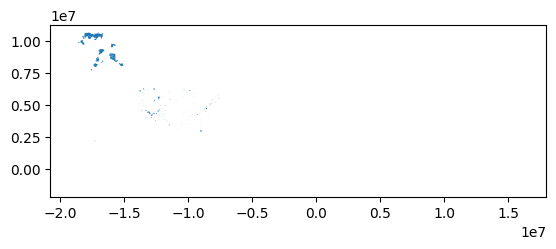

In [ ]:
## Read in the NPS boundary file shapefile.

import geopandas as gpd

# Correct path to the .shp file (modify if needed)
shp_file_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/nps_boundary.shp"

# Load the shapefile
try:
    gdf = gpd.read_file(shp_file_path)

    # Display the first few rows of the GeoDataFrame
    print(gdf.head())

    # Plot the shapefile
    gdf.plot()
except FileNotFoundError:
    print(f"File not found: {shp_file_path}")
except Exception as e:
    print(f"An error occurred while loading the shapefile: {e}")

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/drive/MyDrive/Work/IORT/GNAR_Initiative/Research/GNAR_Student_Research/Capstones_Thesis/Elizabeth_Depew/Smith_Reanalysis/NPS/nps_boundary.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

    CreationDa         Creator    EditDate          Editor  \
69  2024-10-02  NPS_WASO_LANDS  2024-10-02  NPS_WASO_LANDS   
70  2024-10-02  NPS_WASO_LANDS  2024-10-02  NPS_WASO_LANDS   
72  2024-10-02  NPS_WASO_LANDS  2024-10-02  NPS_WASO_LANDS   
79  2024-10-02  NPS_WASO_LANDS  2024-10-02  NPS_WASO_LANDS   
83  2024-10-02  NPS_WASO_LANDS  2024-10-02  NPS_WASO_LANDS   

                                GlobalID  AreaID UNIT_CODE  \
69  018bc30d-abf7-4732-a277-bf81815fdb88      51      CANY   
70  06dfc486-ecfb-4e21-b47c-b43825db3166      52      ARCH   
72  23ccbd85-dfad-4965-8b50-a28ab53d5a41      54      BLCA   
79  a6fba541-0aae-4688-ab3a-b2ecd01e0060      61      GLAC   
83  1bc1af49-d612-4da1-a49d-f3831222a2ec      65      GRTE   

                                            GIS_Notes  \
69  Lands - http://landsnet.nps.gov/tractsnet/docu...   
70  Lands - http://landsnet.nps.gov/tractsnet/docu...   
72  Lands - http://landsnet.nps.gov/tractsnet/docu...   
79  Lands - http://landsne

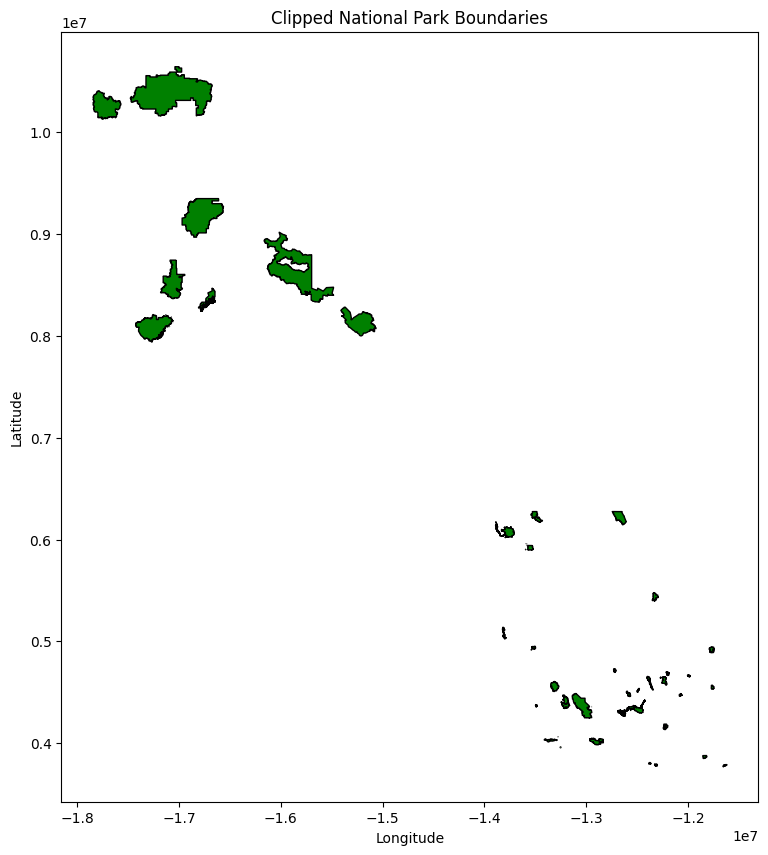

Clipped shapefile saved to Filtered_nps_boundary.shp


In [ ]:
## Clip the NPS boundary file to just the western states. Print a list of the UNIT_CODEs in the western states. Plot clipped shapefile.

import geopandas as gpd
import pandas as pd  # Ensure pandas is imported
import matplotlib.pyplot as plt  # Import for plotting

# Path to the shapefile
shapefile_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/nps_boundary.shp"

# Define the list of states to include and the unit type
states_to_include = ["CO", "AK", "UT", "MT", "CA", "AZ", "WA", "WY", "NM", "NV"]
unit_type_to_include = "National Park"

# Load the shapefile
try:
    gdf = gpd.read_file(shapefile_path)

    # Filter the GeoDataFrame to include only the specified states and unit type
    clipped_gdf = gdf[
        (gdf['STATE'].isin(states_to_include)) & (gdf['UNIT_TYPE'] == unit_type_to_include)
    ]

    # Convert datetime fields to date if they exist
    datetime_columns = ["CreationDa", "EditDate", "DATE_EDIT"]
    for col in datetime_columns:
        if col in clipped_gdf.columns:
            clipped_gdf[col] = clipped_gdf[col].apply(lambda x: x.date() if pd.notnull(x) else x)

    # Display the first few rows of the filtered GeoDataFrame
    print(clipped_gdf.head())

    # Print unique UNIT_CODE values
    unique_unit_codes = clipped_gdf['UNIT_CODE'].unique()
    print("\nUnique UNIT_CODE values in the filtered shapefile:")
    print(unique_unit_codes)

    # Plot the clipped GeoDataFrame
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    clipped_gdf.plot(ax=ax, color="green", edgecolor="black")
    plt.title("Clipped National Park Boundaries")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

    # Save the clipped GeoDataFrame to a new shapefile (optional)
    output_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/Filtered_nps_boundary.shp"
    clipped_gdf.to_file(output_path)
    output_path = "Filtered_nps_boundary.shp"
    clipped_gdf.to_file(output_path)
    print(f"Clipped shapefile saved to {output_path}")
except FileNotFoundError:
    print(f"File not found: {shapefile_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
## Import and merge the Census Designated Place shapefiles (the Census provides them by state).

import geopandas as gpd

# List of shapefile paths
shapefile_paths = [
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_02_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_04_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_06_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_08_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_16_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_30_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_32_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_35_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_41_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_49_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_53_place.shp",
    "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2022_56_place.shp"
]

# Load and merge shapefiles
try:
    # Read all shapefiles into a list of GeoDataFrames
    gdfs = [gpd.read_file(path) for path in shapefile_paths]

    # Concatenate all GeoDataFrames into a single GeoDataFrame
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Save the merged GeoDataFrame to a new shapefile
    output_path = "Merged_Shapefile.shp"
    merged_gdf.to_file(output_path)
    print(f"Merged shapefile saved to {output_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Merged shapefile saved to Merged_Shapefile.shp


In [ ]:
## Convert the merged Census Designated Place shapefile from polygons to points (centroids).

import geopandas as gpd

# Path to the input shapefile
input_shapefile_path = "Merged_Shapefile.shp"

# Path to save the new shapefile with centroids
output_shapefile_path = "Merged_Shapefile_Centroids.shp"

try:
    # Load the shapefile into a GeoDataFrame
    gdf = gpd.read_file(input_shapefile_path)

    # Check and re-project to a projected CRS
    if gdf.crs.is_geographic:
        print(f"Reprojecting from geographic CRS: {gdf.crs} to projected CRS: EPSG:3857")
        gdf = gdf.to_crs("EPSG:3857")  # Use a projected CRS (e.g., Web Mercator)

    # Create a new GeoDataFrame with centroids
    centroid_gdf = gdf.copy()
    centroid_gdf['geometry'] = gdf.geometry.centroid  # Replace geometries with centroids

    # Re-project centroids back to the original CRS for consistency
    centroid_gdf = centroid_gdf.to_crs(gdf.crs)

    # Save the new GeoDataFrame to a shapefile
    centroid_gdf.to_file(output_shapefile_path)
    print(f"Centroid shapefile saved to {output_shapefile_path}")
except FileNotFoundError:
    print(f"File not found: {input_shapefile_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Reprojecting from geographic CRS: EPSG:4269 to projected CRS: EPSG:3857
Centroid shapefile saved to Merged_Shapefile_Centroids.shp


In [ ]:
## Import both the clipped NPS boundary file and the Census Designated Place shapefile. Calculate the distance between the CDP and the boundary of it's closest national park.

import geopandas as gpd

# Paths to input shapefiles
centroids_path = "Merged_Shapefile_Centroids.shp"
boundaries_path = "Filtered_nps_boundary.shp"

# Paths to save reprojected shapefiles (optional, if you want to save intermediate files)
reprojected_centroids_path = "Merged_Shapefile_Centroids_EPSG3857.shp"
reprojected_boundaries_path = "Filtered_nps_boundary_EPSG3857.shp"

# Path to save final outputs
output_shapefile_path = "Centroids_with_Shortest_Distances.shp"
output_csv_path = "Centroids_with_Shortest_Distances.csv"

# Load the GeoDataFrames
centroids_gdf = gpd.read_file(centroids_path)
boundaries_gdf = gpd.read_file(boundaries_path)

# Reproject both GeoDataFrames to EPSG:3857
if centroids_gdf.crs != "EPSG:3857":
    print(f"Reprojecting centroids from {centroids_gdf.crs} to EPSG:3857")
    centroids_gdf = centroids_gdf.to_crs("EPSG:3857")
    centroids_gdf.to_file(reprojected_centroids_path)  # Save the reprojected centroids (optional)

if boundaries_gdf.crs != "EPSG:3857":
    print(f"Reprojecting boundaries from {boundaries_gdf.crs} to EPSG:3857")
    boundaries_gdf = boundaries_gdf.to_crs("EPSG:3857")
    boundaries_gdf.to_file(reprojected_boundaries_path)  # Save the reprojected boundaries (optional)

# Calculate the closest boundary and its UNIT_CODE for each centroid
closest_unit_codes = []
closest_distances = []

for centroid in centroids_gdf.geometry:
    # Calculate the distance to each boundary and find the closest one
    distances = boundaries_gdf.geometry.apply(lambda boundary: centroid.distance(boundary))
    min_distance_idx = distances.idxmin()  # Index of the closest boundary
    closest_unit_codes.append(boundaries_gdf.loc[min_distance_idx, "UNIT_CODE"])
    closest_distances.append(distances[min_distance_idx])

# Add the closest UNIT_CODE and distances to the centroids GeoDataFrame
centroids_gdf["closest_UNIT_CODE"] = closest_unit_codes
centroids_gdf["dist_m"] = closest_distances
centroids_gdf["dist_mi"] = centroids_gdf["dist_m"] * 0.000621371

print(f"Updated CRS: {centroids_gdf.crs}")

# Save the updated centroids GeoDataFrame to a new shapefile
centroids_gdf.to_file(output_shapefile_path)
print(f"Shapefile saved to {output_shapefile_path}")

# Save the attribute table as a CSV file
centroids_gdf.drop(columns="geometry").to_csv(output_csv_path, index=False)
print(f"Attribute table saved to {output_csv_path}")

Updated CRS: EPSG:3857
Shapefile saved to Centroids_with_Shortest_Distances.shp


<ipython-input-6-26380c9f3787>:51: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  centroids_gdf.to_file(output_shapefile_path)
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'closest_UNIT_CODE' to 'closest_UN'
  ogr_write(


Attribute table saved to Centroids_with_Shortest_Distances.csv


In [ ]:
## Download national park visitation data.

import requests

# Base URL for the API
base_url = "https://irmaservices.nps.gov/Stats/v1/visitation"

# Parameters for API calls
start_month = 1
end_month = 12
start_year = 2010
end_year = 2022
unit_codes = [
    "CANY", "ARCH", "BLCA", "GLAC", "GRTE", "GRSA", "MEVE", "ROMO", "BRCA", "CARE",
    "ZION", "CAVE", "WHSA", "CHIS", "DEVA", "GRCA", "JOTR", "LAVO", "GRBA", "PEFO",
    "PINN", "REDW", "SEQU", "KICA", "SAGU", "YOSE", "MORA", "NOCA", "OLYM", "DENA",
    "GAAR", "GLBA", "KATM", "KEFJ", "KOVA", "LACL", "WRST"
]

# Loop through each UNITCODE and make the API call
for unit_code in unit_codes:
    # Construct the API URL
    url = f"{base_url}?unitCodes={unit_code}&startMonth={start_month}&startYear={start_year}&endMonth={end_month}&endYear={end_year}"
    print(f"Fetching data for UNITCODE: {unit_code}...")

    try:
        # Make the API request
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses

        # Save the response content as an XML file
        output_file = f"{unit_code}_visitation_data.xml"
        with open(output_file, "wb") as file:
            file.write(response.content)
            print(f"Data for {unit_code} saved to {output_file}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {unit_code}: {e}")

Fetching data for UNITCODE: CANY...
Data for CANY saved to CANY_visitation_data.xml
Fetching data for UNITCODE: ARCH...
Data for ARCH saved to ARCH_visitation_data.xml
Fetching data for UNITCODE: BLCA...
Data for BLCA saved to BLCA_visitation_data.xml
Fetching data for UNITCODE: GLAC...
Data for GLAC saved to GLAC_visitation_data.xml
Fetching data for UNITCODE: GRTE...
Data for GRTE saved to GRTE_visitation_data.xml
Fetching data for UNITCODE: GRSA...
Data for GRSA saved to GRSA_visitation_data.xml
Fetching data for UNITCODE: MEVE...
Data for MEVE saved to MEVE_visitation_data.xml
Fetching data for UNITCODE: ROMO...
Data for ROMO saved to ROMO_visitation_data.xml
Fetching data for UNITCODE: BRCA...
Data for BRCA saved to BRCA_visitation_data.xml
Fetching data for UNITCODE: CARE...
Data for CARE saved to CARE_visitation_data.xml
Fetching data for UNITCODE: ZION...
Data for ZION saved to ZION_visitation_data.xml
Fetching data for UNITCODE: CAVE...
Data for CAVE saved to CAVE_visitation_d

In [ ]:
## Parse .XML files of national park visitation.

import xml.etree.ElementTree as ET
import pandas as pd

# List of XML files to process
xml_files = [
    "CANY_visitation_data.xml", "ARCH_visitation_data.xml", "BLCA_visitation_data.xml", "GLAC_visitation_data.xml",
    "GRTE_visitation_data.xml", "GRSA_visitation_data.xml", "MEVE_visitation_data.xml", "ROMO_visitation_data.xml",
    "BRCA_visitation_data.xml", "CARE_visitation_data.xml", "ZION_visitation_data.xml", "CAVE_visitation_data.xml",
    "WHSA_visitation_data.xml", "CHIS_visitation_data.xml", "DEVA_visitation_data.xml", "GRCA_visitation_data.xml",
    "JOTR_visitation_data.xml", "LAVO_visitation_data.xml", "GRBA_visitation_data.xml", "PEFO_visitation_data.xml",
    "PINN_visitation_data.xml", "REDW_visitation_data.xml", "SEQU_visitation_data.xml", "KICA_visitation_data.xml",
    "SAGU_visitation_data.xml", "YOSE_visitation_data.xml", "MORA_visitation_data.xml", "NOCA_visitation_data.xml",
    "OLYM_visitation_data.xml", "DENA_visitation_data.xml", "GAAR_visitation_data.xml", "GLBA_visitation_data.xml",
    "KATM_visitation_data.xml", "KEFJ_visitation_data.xml", "KOVA_visitation_data.xml", "LACL_visitation_data.xml",
    "WRST_visitation_data.xml"
]

# Define the namespace
namespace = {'ns': 'http://schemas.datacontract.org/2004/07/NPS.Stats.Service.Rest.v3'}

# Loop over each XML file
for xml_file in xml_files:
    try:
        # Parse the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Initialize a list to store parsed data
        data = []

        # Iterate through each VisitationData element
        for record in root.findall("ns:VisitationData", namespace):
            # Extract data from each field
            month = record.find("ns:Month", namespace).text
            non_recreation_visitors = record.find("ns:NonRecreationVisitors", namespace).text
            recreation_visitors = record.find("ns:RecreationVisitors", namespace).text
            unit_code = record.find("ns:UnitCode", namespace).text
            unit_name = record.find("ns:UnitName", namespace).text
            year = record.find("ns:Year", namespace).text

            # Append the extracted data to the list
            data.append({
                "Month": int(month),
                "NonRecreationVisitors": int(non_recreation_visitors),
                "RecreationVisitors": int(recreation_visitors),
                "UnitCode": unit_code,
                "UnitName": unit_name,
                "Year": int(year)
            })

        # Convert the data into a pandas DataFrame
        df = pd.DataFrame(data)

        # Save the DataFrame to a unique CSV file
        output_csv_path = f"{xml_file.replace('_visitation_data.xml', '_visitation_data.csv')}"
        df.to_csv(output_csv_path, index=False)
        print(f"Data saved to {output_csv_path}")
    except Exception as e:
        print(f"Error processing file {xml_file}: {e}")

Data saved to CANY_visitation_data.csv
Data saved to ARCH_visitation_data.csv
Data saved to BLCA_visitation_data.csv
Data saved to GLAC_visitation_data.csv
Data saved to GRTE_visitation_data.csv
Data saved to GRSA_visitation_data.csv
Data saved to MEVE_visitation_data.csv
Data saved to ROMO_visitation_data.csv
Data saved to BRCA_visitation_data.csv
Data saved to CARE_visitation_data.csv
Data saved to ZION_visitation_data.csv
Data saved to CAVE_visitation_data.csv
Data saved to WHSA_visitation_data.csv
Data saved to CHIS_visitation_data.csv
Data saved to DEVA_visitation_data.csv
Data saved to GRCA_visitation_data.csv
Data saved to JOTR_visitation_data.csv
Data saved to LAVO_visitation_data.csv
Data saved to GRBA_visitation_data.csv
Data saved to PEFO_visitation_data.csv
Data saved to PINN_visitation_data.csv
Data saved to REDW_visitation_data.csv
Data saved to SEQU_visitation_data.csv
Data saved to KICA_visitation_data.csv
Data saved to SAGU_visitation_data.csv
Data saved to YOSE_visita

In [ ]:
## Combine national park visitation data.

import pandas as pd
import os

# List of CSV files
csv_files = [
    "CANY_visitation_data.csv", "ARCH_visitation_data.csv", "BLCA_visitation_data.csv", "GLAC_visitation_data.csv",
    "GRTE_visitation_data.csv", "GRSA_visitation_data.csv", "MEVE_visitation_data.csv", "ROMO_visitation_data.csv",
    "BRCA_visitation_data.csv", "CARE_visitation_data.csv", "ZION_visitation_data.csv", "CAVE_visitation_data.csv",
    "WHSA_visitation_data.csv", "CHIS_visitation_data.csv", "DEVA_visitation_data.csv", "GRCA_visitation_data.csv",
    "JOTR_visitation_data.csv", "LAVO_visitation_data.csv", "GRBA_visitation_data.csv", "PEFO_visitation_data.csv",
    "PINN_visitation_data.csv", "REDW_visitation_data.csv", "SEQU_visitation_data.csv", "KICA_visitation_data.csv",
    "SAGU_visitation_data.csv", "YOSE_visitation_data.csv", "MORA_visitation_data.csv", "NOCA_visitation_data.csv",
    "OLYM_visitation_data.csv", "DENA_visitation_data.csv", "GAAR_visitation_data.csv", "GLBA_visitation_data.csv",
    "KATM_visitation_data.csv", "KEFJ_visitation_data.csv", "KOVA_visitation_data.csv", "LACL_visitation_data.csv",
    "WRST_visitation_data.csv"
]

# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Loop over each file and append its data to the combined DataFrame
for csv_file in csv_files:
    if os.path.exists(csv_file):
        df = pd.read_csv(csv_file)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    else:
        print(f"File not found: {csv_file}")

# Group by UnitCode and Year, and calculate the sum of RecreationVisitors
summed_df = (
    combined_df.groupby(["UnitCode", "Year"], as_index=False)
    .agg({"RecreationVisitors": "sum"})
)

# Save the result to a new CSV file
output_file = "summed_visitation_data.csv"
summed_df.to_csv(output_file, index=False)
print(f"Summed visitation data saved to {output_file}")

Summed visitation data saved to summed_visitation_data.csv


In [ ]:
## Constitute the GEOID variable from the ACS data.

import pandas as pd

# Path to the input CSV file
input_csv_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/combined_dataset_2010_2023.csv"

# Path to save the updated CSV file
output_csv_path = "combined_dataset_2010_2023_with_geoid.csv"

# Read the CSV file
df = pd.read_csv(input_csv_path)

# Ensure 'state' and 'place_code' columns are numeric, then format them
df['state'] = df['state'].apply(lambda x: f"{int(x):02d}" if pd.notnull(x) else "00")
df['place_code'] = df['place_code'].apply(lambda x: f"{int(x):05d}" if pd.notnull(x) else "00000")

# Create the GEOID column by concatenating the formatted state and place_code
df['GEOID'] = df['state'] + df['place_code']

# Ensure GEOID is exactly 7 numeric digits with leading zeros if needed
df['GEOID'] = df['GEOID'].apply(lambda x: f"{int(x):07d}")

# Save the updated DataFrame to a new CSV file
df.to_csv(output_csv_path, index=False)

print(f"Updated file with GEOID column saved to {output_csv_path}")

<ipython-input-10-a9fca13ef651>:12: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)


Updated file with GEOID column saved to combined_dataset_2010_2023_with_geoid.csv


In [ ]:
## Add the appropriate national park unit code to each CDP.
import pandas as pd

# File paths
dataset1_path = "combined_dataset_2010_2023_with_geoid.csv"
dataset2_path = "Centroids_with_Shortest_Distances.csv"
output_path = "combined_dataset_2010_2023_with_geoid_unit_codes.csv"

# Read in the datasets
dataset1 = pd.read_csv(dataset1_path)
dataset2 = pd.read_csv(dataset2_path)

# Retain only the specified columns from dataset2
columns_to_keep = ["GEOID", "dist_m"]
dataset2_filtered = dataset2[columns_to_keep]

# Merge the datasets on the GEOID column
merged_dataset = pd.merge(dataset1, dataset2_filtered, on="GEOID", how="inner")

# Save the merged dataset to a CSV file
merged_dataset.to_csv(output_path, index=False)

# Print confirmation
print(f"Merged dataset saved to {output_path}")

<ipython-input-11-496e2db51fc9>:10: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset1 = pd.read_csv(dataset1_path)


Merged dataset saved to combined_dataset_2010_2023_with_geoid_unit_codes.csv


In [ ]:
## Define and populate the GNAR_pop_req variable.

import pandas as pd
import numpy as np

# Path to the input CSV file
input_file = "combined_dataset_2010_2023_with_geoid_unit_codes.csv"

# Load the dataset
df = pd.read_csv(input_file)

# Replace specific values with NaN across the entire DataFrame
df.replace([-666666666, -333333333, -222222222, -888888888, -555555555, "-666666666", "-333333333", "-222222222", "-888888888", "-555555555"], np.nan, inplace=True)

# Create a new column 'GNAR_pop_req' and code it based on the 'pop_size' condition
df['GNAR_pop_req'] = df['pop_size'].apply(lambda x: 1 if 150 < x < 25000 else 0)

# Save the updated dataset to a new CSV file
output_file = "combined_dataset_2010_2023_gnar_pop_req.csv"
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

<ipython-input-12-2fd2447409e6>:10: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Updated dataset saved to combined_dataset_2010_2023_gnar_pop_req.csv


In [ ]:
## Create a dataset just with the 2019 data.

import pandas as pd

# Path to the input CSV file
input_file = "combined_dataset_2010_2023_gnar_pop_req.csv"

# Load the dataset
df = pd.read_csv(input_file)

# Filter the dataset for rows where the year is 2023
df_2019 = df[df['year'] == 2019]

# Save the filtered dataset to a new CSV file
output_file = "combined_dataset_2019_only.csv"
df_2019.to_csv(output_file, index=False)

print(f"Filtered dataset saved to {output_file}")

Filtered dataset saved to combined_dataset_2019_only.csv


<ipython-input-13-1362e9669454>:9: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


In [ ]:
## Add the current tabular data to the shapefile of CDPs.

import geopandas as gpd
import pandas as pd
import numpy as np

# Paths to the input files
csv_path = "combined_dataset_2019_only.csv"
shapefile_path = "Centroids_with_Shortest_Distances.shp"

# Path to save the updated shapefile
output_shapefile_path = "Centroids_with_Additional_Data.shp"

# Load the shapefile as a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Load the CSV file as a DataFrame
df = pd.read_csv(csv_path)

# Ensure 'GEOID' is a string and correctly formatted to 7 digits in both datasets
gdf['GEOID'] = gdf['GEOID'].astype(str).str.zfill(7)
df['GEOID'] = df['GEOID'].astype(str).str.zfill(7)

# Merge the GeoDataFrame and DataFrame on the 'GEOID' column
merged_gdf = gdf.merge(df, on='GEOID', how='left')

# Save the merged GeoDataFrame to a new shapefile
merged_gdf.to_file(output_shapefile_path)

print(f"Merged shapefile saved to {output_shapefile_path}")

<ipython-input-14-a839e7a35c09>:28: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file(output_shapefile_path)
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'pct_jobs_ort' to 'pct_jobs_o'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'pct_jobs_ort_m' to 'pct_jobs_1'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'med_earnings' to 'med_earnin'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'med_earnings_m' to 'med_earn_1'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GNAR_pop_req' to 'GNAR_pop_r'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw

Merged shapefile saved to Centroids_with_Additional_Data.shp


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4555 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4564 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4583 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4596 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gi

In [ ]:
## Define and populate the GNAR_np_r variable.

import geopandas as gpd
from shapely.ops import nearest_points

# Paths to the shapefiles
boundary_shapefile_path = "Filtered_nps_boundary.shp"
centroids_shapefile_path = "Centroids_with_Additional_Data.shp"
output_shapefile_path = "Centroids_with_GNAR_np_r.shp"

# Load the boundary and centroids shapefiles
boundary_gdf = gpd.read_file(boundary_shapefile_path)
centroids_gdf = gpd.read_file(centroids_shapefile_path)

# Ensure both GeoDataFrames use the same CRS
boundary_gdf = boundary_gdf.to_crs(epsg=3857)
centroids_gdf = centroids_gdf.to_crs(boundary_gdf.crs)

# Create a 10-mile buffer (10 miles = 16093.4 meters)
boundary_gdf['buffered_geometry'] = boundary_gdf.geometry.buffer(16093.4)

# Use union_all() to create a single merged geometry of all boundaries
merged_boundaries = boundary_gdf.geometry.union_all()

# Function to find the nearest boundary's UNIT_CODE for a centroid
def find_nearest_unit_code(centroid, boundary_df, merged_geometry):
    # Find the nearest boundary geometry using the merged geometry
    nearest_geom = nearest_points(centroid, merged_geometry)[1]
    # Locate the nearest boundary row by finding the minimum distance
    nearest_boundary_idx = boundary_df.geometry.distance(nearest_geom).idxmin()
    # Return the UNIT_CODE of the nearest boundary
    return boundary_df.loc[nearest_boundary_idx, 'UNIT_CODE']

# Function to determine if a centroid is within any buffer
def is_within_any_buffer(centroid, buffered_geometries):
    return any(centroid.within(buffer) for buffer in buffered_geometries)

# Apply the function to check if centroids are within the buffer
centroids_gdf['GNAR_np_r'] = centroids_gdf.geometry.apply(
    lambda centroid: 1 if is_within_any_buffer(centroid, boundary_gdf['buffered_geometry']) else 0
)

# Apply the function to find the nearest UNIT_CODE only if GNAR_np_r is 1
centroids_gdf['UNIT_CODE'] = centroids_gdf.apply(
    lambda row: find_nearest_unit_code(row.geometry, boundary_gdf, merged_boundaries) if row['GNAR_np_r'] == 1 else None,
    axis=1
)

# Save the updated centroids GeoDataFrame to a shapefile
centroids_gdf.to_file(output_shapefile_path)

print(f"Updated shapefile with UNIT_CODE and GNAR_np_r attributes saved to {output_shapefile_path}")

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 55 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 140 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 155 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 164 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of

Updated shapefile with UNIT_CODE and GNAR_np_r attributes saved to Centroids_with_GNAR_np_r.shp


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5350 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5411 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5425 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5445 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gi

In [ ]:
## Define and populate the GNAR_ua_r variable.

import geopandas as gpd

# Paths to the shapefiles
urban_areas_shapefile_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/tl_2020_us_uac20_corrected.shp"
centroids_shapefile_path = "Centroids_with_GNAR_np_r.shp"
output_shapefile_path = "Centroids_with_GNAR_ua_r_outside.shp"

# Load the urban areas shapefile
urban_areas_gdf = gpd.read_file(urban_areas_shapefile_path)

# Ensure the CRS is set and projected
urban_areas_gdf = urban_areas_gdf.to_crs(epsg=3857)  # EPSG:3857 uses meters as units

# Create a 15-mile buffer (15 miles = 24140.2 meters)
urban_areas_gdf['geometry'] = urban_areas_gdf['geometry'].buffer(24140.2)

# Load the centroids shapefile
centroids_gdf = gpd.read_file(centroids_shapefile_path)

# Ensure centroids are in the same CRS as the urban areas buffer
centroids_gdf = centroids_gdf.to_crs(urban_areas_gdf.crs)

# Perform a spatial check to identify centroids outside the buffer
centroids_gdf['GNAR_ua_r'] = centroids_gdf.geometry.apply(
    lambda geom: not any(geom.within(buffer_geom) for buffer_geom in urban_areas_gdf.geometry)
).astype(int)  # Convert boolean to int (1 for outside the buffer, 0 otherwise)

# Save the updated centroids shapefile
centroids_gdf.to_file(output_shapefile_path)

print(f"Updated shapefile with GNAR_ua_r attribute saved to {output_shapefile_path}")

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 55 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 140 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 155 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 164 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of

Updated shapefile with GNAR_ua_r attribute saved to Centroids_with_GNAR_ua_r_outside.shp


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4698 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4993 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4995 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5014 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gi

In [ ]:
## Define and populate the GNAR variable. Identify the number of other GNARs within 10 miles of each GNAR community.

import geopandas as gpd
from shapely.geometry import Point

# Path to the input shapefile
input_shapefile_path = "Centroids_with_GNAR_ua_r_outside.shp"

# Load the shapefile
centroids_gdf = gpd.read_file(input_shapefile_path)

# Ensure the CRS is projected (using EPSG:3857 for meters)
centroids_gdf = centroids_gdf.to_crs(epsg=3857)

# Step 1: Create the "GNAR" variable
centroids_gdf['GNAR'] = centroids_gdf.apply(
    lambda row: 1 if row['GNAR_pop_r'] == 1 and row['GNAR_np_r'] == 1 and row['GNAR_ua_r'] == 1 else 0,
    axis=1
)

# Step 2: Create a 10-mile buffer (10 miles = 16093.4 meters) for points where "GNAR" is 1
# Extract points where GNAR is 1
gnar_points = centroids_gdf[centroids_gdf['GNAR'] == 1]

# Create the 10-mile buffers
gnar_points['buffer'] = gnar_points.geometry.buffer(16093.4)

# Initialize a new column for GNAR counts within the buffer
centroids_gdf['GNAR_count_within_buffer'] = 0

# Iterate through GNAR points and count other GNAR points within each buffer
for idx, gnar_point in gnar_points.iterrows():
    buffer_geom = gnar_point['buffer']
    # Count GNAR points within the buffer
    count_within_buffer = gnar_points[gnar_points.geometry.within(buffer_geom)].shape[0]
    # Update the corresponding row in the original GeoDataFrame
    centroids_gdf.loc[idx, 'GNAR_count_within_buffer'] = count_within_buffer

# Save the updated GeoDataFrame to a new shapefile
output_shapefile_path = "Centroids_with_GNAR_updated.shp"
centroids_gdf.to_file(output_shapefile_path)

print(f"Updated shapefile with GNAR and GNAR_count_within_buffer saved to {output_shapefile_path}")

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-17-97b0cfaed9d2>:41: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  centroids_gdf.to_file(output_shapefile_path)
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GNAR_count_within_buffer' to 'GNAR_count'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 55 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packa

Updated shapefile with GNAR and GNAR_count_within_buffer saved to Centroids_with_GNAR_updated.shp


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4596 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4698 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4993 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 4995 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gi

In [ ]:
## Export the current shapefile's attribute table as a .CSV for analyis.

import geopandas as gpd

# Path to the input shapefile
input_shapefile_path = "Centroids_with_GNAR_updated.shp"

# Path to save the exported CSV file
output_csv_path = "Centroids_with_GNAR_updated.csv"


# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(input_shapefile_path)

# Drop the geometry column to keep only the attribute table
attribute_table = gdf.drop(columns='geometry')

# Export the attribute table to a CSV file
attribute_table.to_csv(output_csv_path, index=False)

print(f"Attribute table exported to {output_csv_path}")

Attribute table exported to Centroids_with_GNAR_updated.csv


In [ ]:
## Merge the tabular dataset of all years with the tabular data for just 2019 (used to calculate spatial metrics and descriptors).

import pandas as pd

# Paths to input CSV files
file1_path = "combined_dataset_2010_2023_gnar_pop_req.csv"
file2_path = "Centroids_with_GNAR_updated.csv"

# Path to save the merged dataset
output_path = "NP_associated_GNARs_2010_2023.csv"

# Specify column types for consistent import
dtype_dict_file1 = {
    'GEOID': str,  # Ensure GEOID is read as a string
    'state': str,  # Ensure state is read as a string
    'place_code': str  # Ensure place_code is read as a string
}

dtype_dict_file2 = {
    'GEOID': str,  # Ensure GEOID is read as a string
    'GNAR_pop_r': 'float64',  # Numeric column
    'GNAR_np_r': 'float64',  # Numeric column
    'GNAR_ua_r': 'float64'  # Numeric column
}

# Load the datasets with specified types
df1 = pd.read_csv(file1_path, dtype=dtype_dict_file1, low_memory=False)
df2 = pd.read_csv(file2_path, dtype=dtype_dict_file2, low_memory=False)

# Ensure GEOID has exactly seven digits in both datasets
df1['GEOID'] = df1['GEOID'].str.zfill(7)
df2['GEOID'] = df2['GEOID'].str.zfill(7)

# Select only the relevant columns from the second dataset
df2_subset = df2[['GEOID', 'UNIT_CODE', 'GNAR_pop_r', 'GNAR_np_r', 'GNAR_ua_r','GNAR', 'GNAR_count']]

# Merge the datasets based on the GEOID variable
merged_df = pd.merge(df1, df2_subset, on='GEOID', how='left')

# Save the merged dataset to a new CSV file
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved to {output_path}")

Merged dataset saved to NP_associated_GNARs_2010_2023.csv


In [ ]:
## Generate a table of unique CDP place names.

import pandas as pd

# Path to the input CSV file
input_csv_path = "NP_associated_GNARs_2010_2023.csv"

# Load the dataset
df = pd.read_csv(input_csv_path)

# Filter the rows where GNAR is 1
gnar_places = df[df['GNAR'] == 1][['place_name']].drop_duplicates()

# Reset index for a clean table
gnar_places.reset_index(drop=True, inplace=True)

# Print the resulting table
print("Table of unique place_name values where GNAR is equal to 1:")
print(gnar_places)

# Save the table to a CSV file (optional)
output_csv_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/Unique_GNAR_Places.csv"
gnar_places.to_csv(output_csv_path, index=False)

print(f"Table saved to {output_csv_path}")

<ipython-input-20-0dad531382d4>:9: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)


Table of unique place_name values where GNAR is equal to 1:
                                place_name
0              Anaktuvuk Pass city, Alaska
1                  Ashford CDP, Washington
2              Bitter Springs CDP, Arizona
3             Bryce Canyon City town, Utah
4                     Cantwell CDP, Alaska
5                   Cannonville town, Utah
6                  Crawford town, Colorado
7            Desert Center CDP, California
8                El Portal CDP, California
9   East Glacier Park Village CDP, Montana
10                  Forks city, Washington
11                      Gakona CDP, Alaska
12       Grand Canyon Village CDP, Arizona
13                   Gustavus city, Alaska
14                  Henrieville town, Utah
15                 Klamath CDP, California
16                 King Salmon CDP, Alaska
17                   Meadview CDP, Arizona
18                Lowell Point CDP, Alaska
19                 Mineral CDP, Washington
20                 Mineral CDP, Calif

In [ ]:
## Calculate the driving distance from each CDP to the closests visitor center.
!pip install googlemaps

import geopandas as gpd
import googlemaps
from concurrent.futures import ThreadPoolExecutor

# File paths
centroids_path = "Centroids_with_GNAR_updated.shp"
points_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/NPS_-_Points_of_Interest_(POIs)_-_Geographic_Coordinate_System.shp"
output_centroids_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/Centroids_with_GNAR_updated_with_driving_dist.shp"
output_centroids_path2 = "Centroids_with_GNAR_updated_with_driving_dist.shp"

# Load data
centroids = gpd.read_file(centroids_path)
points = gpd.read_file(points_path)

# Google Maps API Key
gmaps = googlemaps.Client(key='[YOUR API KEY HERE]')

# Filter visitor centers
visitor_centers = points[points['POITYPE'] == 'Visitor Center']

# Ensure data is in geographic CRS (EPSG:4326) for Google Maps API
centroids = centroids.to_crs(epsg=4326)
visitor_centers = visitor_centers.to_crs(epsg=4326)

# Filter centroids where GNAR == 1 and create an explicit copy
gnar_centroids = centroids[centroids['GNAR'] == 1].copy()

# Reproject to a projected CRS for accurate planar distance calculations (e.g., EPSG:3857)
projected_crs = "EPSG:3857"
visitor_centers_projected = visitor_centers.to_crs(projected_crs)
gnar_centroids_projected = gnar_centroids.to_crs(projected_crs)

# Function to find the nearest visitor center and calculate driving distance
def get_nearest_visitor_center_distance(centroid_projected, centroid_original):
    """
    Finds the nearest visitor center using planar distances and calculates driving distance.
    """
    try:
        # Calculate planar distances in projected CRS
        visitor_centers_projected['distance'] = visitor_centers_projected.geometry.distance(centroid_projected)
        nearest_vc_projected = visitor_centers_projected.sort_values('distance').iloc[0]

        # Reproject the nearest visitor center back to EPSG:4326
        nearest_vc_geo = gpd.GeoSeries([nearest_vc_projected.geometry], crs=projected_crs).to_crs(epsg=4326).iloc[0]

        # Reproject the centroid back to EPSG:4326 to get the correct origin
        centroid_geo = gpd.GeoSeries([centroid_projected], crs=projected_crs).to_crs(epsg=4326).iloc[0]

        # Extract geographic coordinates (latitude, longitude)
        origin = (centroid_geo.y, centroid_geo.x)  # Centroid in EPSG:4326
        destination = (nearest_vc_geo.y, nearest_vc_geo.x)  # Visitor center in EPSG:4326

        print(f"Origin: {origin}, Destination: {destination}")  # Debugging

        # Google Maps API call for driving distance
        result = gmaps.distance_matrix(origins=origin, destinations=destination, mode='driving')
        distance = result['rows'][0]['elements'][0]['distance']['value'] / 1000  # Convert to kilometers
        return distance
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return float('inf')

# Apply distance calculation with parallelization
with ThreadPoolExecutor(max_workers=5) as executor:
    distances = list(executor.map(
        lambda row: get_nearest_visitor_center_distance(row[1].geometry, row[1].geometry),
        gnar_centroids_projected.iterrows()
    ))

# Update the GNAR centroids GeoDataFrame with calculated distances
gnar_centroids.loc[:, 'VC_dist'] = distances

# Drop unnecessary columns if they exist
centroids = centroids.drop(columns=['VC_dist_x', 'VC_dist_y'], errors='ignore')

# Merge the new distances back into the original centroids GeoDataFrame
centroids = centroids.merge(
    gnar_centroids[['GEOID', 'VC_dist']],
    on='GEOID',
    how='left'
)

if 'VC_dist_y' in centroids.columns:
    centroids['VC_dist'] = centroids['VC_dist_y']  # Rename the column
    centroids = centroids.drop(columns=['VC_dist_x', 'VC_dist_y'], errors='ignore')

# Save the updated centroids shapefile
centroids.to_file(output_centroids_path, driver='ESRI Shapefile')
centroids.to_file(output_centroids_path2, driver='ESRI Shapefile')

print("Driving distances to the nearest visitor center calculated and saved.")

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40715 sha256=a8c5844785d01d03e90d37f06eb1ceb0e69b73d51971bff7e7e12ea57c5937f0
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps
Origin: (60.10884768251809, -149.3950002791617), Destination: (60.11627270400003, -149.43972111299996)
Origin: (58.41494200101856, -135.73409409196591), Destination: (58.45465676700008, -135.88239176999997)
Origin: (68.15000753169019, -151.7161815437577), Destination: (68.14220627800006, -151.73698381099996)
Origin: (63.37906630046997, -148.8157529319661), Destination: (63.730910029000036, -148.91710314099998)
Origin: (63.59143009432375, -148.7109539803299), Destination: (63.730910029000036, -148.91710314099998)
Origin: (62.360919702520825, -145.265643902784), Destination: (62.019973199000034, -145.36336233399996)
Origin: (60.06291878033765, -149.48993135

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 55 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 140 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 155 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 164 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of

Driving distances to the nearest visitor center calculated and saved.


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5781 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5808 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5809 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 5810 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gi

In [ ]:
import geopandas as gpd
import numpy as np

# File paths
shapefile_path = "Centroids_with_GNAR_updated_with_driving_dist.shp"
csv_file_path = "Centroids_with_GNAR_updated_with_driving_dist.csv"

# Load the shapefile
centroids = gpd.read_file(shapefile_path)

# Define the updates as a dictionary
update_values = {
    "King Salmon": np.nan,
    "Lee Vining": 468.319,
    "Yosemite Valley": 0.804672,
    "Crawford": 108.9526
}

# Update the VC_dist field for matching NAME values
for name, vc_dist in update_values.items():
    centroids.loc[centroids['NAME'] == name, 'VC_dist'] = vc_dist

# Save the updated shapefile back to the original file path
centroids.to_file(shapefile_path, driver='ESRI Shapefile')

# Save the attribute table to a .csv file
centroids.drop(columns='geometry').to_csv(csv_file_path, index=False)

print("VC_dist values updated successfully.")
print(f"Updated shapefile saved at: {shapefile_path}")
print(f"Attribute table saved as CSV: {csv_file_path}")

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 55 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 140 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 155 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of feature 164 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -666666666 of field gini of

VC_dist values updated successfully.
Updated shapefile saved at: Centroids_with_GNAR_updated_with_driving_dist.shp
Attribute table saved as CSV: Centroids_with_GNAR_updated_with_driving_dist.csv


In [ ]:
## Add the VC_dist data to the main dataset.

import pandas as pd

# File paths
vc_dist_file = "Centroids_with_GNAR_updated_with_driving_dist.csv"
output_file = "NP_associated_GNARs_2010_2023.csv"

# Load both datasets
vc_dist_df = pd.read_csv(vc_dist_file)
output_df = pd.read_csv(output_file)

# Select only the columns needed for the merge (GEOID and VC_dist)
vc_dist_df = vc_dist_df[['GEOID', 'VC_dist']]

# Merge the VC_dist column into the output dataset based on GEOID
merged_df = output_df.merge(vc_dist_df, on='GEOID', how='left', suffixes=('_x', '_y'))

# Check if VC_dist_x and VC_dist_y exist, and consolidate them
if 'VC_dist_x' in merged_df.columns and 'VC_dist_y' in merged_df.columns:
    # Ensure they are identical before consolidating
    if (merged_df['VC_dist_x'].fillna(-1) == merged_df['VC_dist_y'].fillna(-1)).all():
        print("VC_dist_x and VC_dist_y are identical. Consolidating into a single column 'VC_dist'.")
        merged_df['VC_dist'] = merged_df['VC_dist_x']
        # Drop the intermediate columns
        merged_df = merged_df.drop(columns=['VC_dist_x', 'VC_dist_y'])
    else:
        print("Warning: VC_dist_x and VC_dist_y are not identical. Keeping both columns for inspection.")
else:
    print("VC_dist_x or VC_dist_y does not exist. No consolidation needed.")

# Save the updated dataset, overwriting the original output file
merged_df.to_csv(output_file, index=False)

print(f"VC_dist column updated successfully. Output file saved to: {output_file}")

<ipython-input-23-ad6201e6f63d>:11: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  output_df = pd.read_csv(output_file)


VC_dist_x or VC_dist_y does not exist. No consolidation needed.
VC_dist column updated successfully. Output file saved to: NP_associated_GNARs_2010_2023.csv


In [ ]:
## Add the visitation data to the current dataset.

import pandas as pd

# File paths
dataset1_path = "NP_associated_GNARs_2010_2023.csv"
dataset2_path = "summed_visitation_data.csv"
output_path = "NP_associated_GNARs_2010_2023_with_visitation.csv"

# Read in the datasets
dataset1 = pd.read_csv(dataset1_path)
dataset2 = pd.read_csv(dataset2_path)

# Merge datasets based on UNIT_CODE/UnitCode and year/Year
merged_dataset = pd.merge(
    dataset1,
    dataset2[['UnitCode', 'Year', 'RecreationVisitors']],  # Select relevant columns
    left_on=['UNIT_CODE', 'year'],  # Columns to match in dataset 1
    right_on=['UnitCode', 'Year'],  # Columns to match in dataset 2
    how='left'  # Preserve all rows from dataset 1
)

# Drop redundant columns from dataset 2
merged_dataset = merged_dataset.drop(columns=['UnitCode', 'Year'])

# Save the merged dataset to a CSV file
merged_dataset.to_csv(output_path, index=False)

# Print confirmation
print(f"Merged dataset saved to {output_path}")

<ipython-input-24-259c2ad28dfb>:11: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset1 = pd.read_csv(dataset1_path)


Merged dataset saved to NP_associated_GNARs_2010_2023_with_visitation.csv


In [ ]:
## Identify benchmark communities.

import pandas as pd

# Define the file path
file_path = "NP_associated_GNARs_2010_2023_with_visitation.csv"

# Read the data file
data = pd.read_csv(file_path)

# Create the "Benchmark" variable
data['Benchmark'] = ((data['pop_size'] > 150) & (data['pop_size'] < 25000) & (data['GNAR_ua_r'] == 1) & (data['GNAR'] == 0)).astype(int)

# Display the first few rows to confirm
print(data.head())

# Optionally save the updated DataFrame to a new file
output_path = "/[YOUR LOCAL FOLDER LOCATION HERE]/NP_associated_GNARs_2010_2023_Benchmark.csv"
data.to_csv(output_path, index=False)

<ipython-input-26-fcfa9d8296de>:9: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


   pop_size  pop_size_m   mig  mig_m  pct_jobs_ort  pct_jobs_ort_m  \
0      58.0        35.0  44.8   22.2          12.8            13.5   
1    2147.0       383.0   6.5    5.1           4.2             2.5   
2   16882.0        32.0   5.5    2.3          14.7             4.5   
3    1612.0       439.0   0.9    1.5           1.7             2.9   
4     192.0        98.0   0.0   16.6           0.0            34.0   

                         place_name  state  place_code  year  ...  \
0                 Adak city, Alaska      2          65  2010  ...   
1              Aberdeen city, Idaho     16         100  2010  ...   
2         Aberdeen city, Washington     53         100  2010  ...   
3    Acalanes Ridge CDP, California      6         135  2010  ...   
4  Aberdeen Gardens CDP, Washington     53         135  2010  ...   

  GNAR_pop_req  UNIT_CODE  GNAR_pop_r  GNAR_np_r  GNAR_ua_r  GNAR GNAR_count  \
0            0        NaN         1.0        0.0        1.0     0          0   
1   